### add your photo here

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving 97e42a82fc7911961d3ca55f54d1372c.jpg to 97e42a82fc7911961d3ca55f54d1372c.jpg


# Using dlib

In [ ]:
from imutils import face_utils 
import numpy as np 
import argparse 
import imutils 
import dlib 
import cv2 

In [ ]:
!wget https://raw.githubusercontent.com/davisking/dlib-models/master/mmod_human_face_detector.dat.bz2
!wget https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat

--2020-11-28 07:25:46--  https://raw.githubusercontent.com/davisking/dlib-models/master/mmod_human_face_detector.dat.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694687 (678K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.41K  --.-KB/s    in 0.03s   

2020-11-28 07:25:47 (19.8 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694687/694687]

--2020-11-28 07:25:47--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HT

In [ ]:
!bzip2 -d mmod_human_face_detector.dat.bz2

In [ ]:
def recog(input_path,input,output_path,cnn_face_detector):
  input_p = input_path+"/"+input
  image = cv2.imread(input_p) 
  image = imutils.resize(image, width = 500)
  if image is None:
    print("Could not read input image")
    exit()
  faces_cnn = cnn_face_detector(image, 1)
  for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)
    crop_img = image[y:y+h, x:x+w]
  img_height, img_width = image.shape[:2] 
  output = output_path+"/"+input
  cv2.imwrite(output, crop_img)

In [ ]:
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
recog(r"/content","/97e42a82fc7911961d3ca55f54d1372c.jpg",r"/content/output",cnn_face_detector)

# Using CVlib

In [ ]:
!pip install cvlib

     |████████████████████████████████| 10.1MB 9.0MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.5-cp36-none-any.whl size=10044206 sha256=6553c55cdd901450247dbc3df7b4fa80316e73db7da2dc2a5aec40d89cd7cbf1
  Stored in directory: /root/.cache/pip/wheels/6a/cb/43/ba188c823836640d8f22ee1f6ff792a0c83a8b66eabf52b219
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12076 sha256=f629dbe6f941eb2a8b4c1d223391ed4233c95e37bb6c89154e96105905a162b4
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


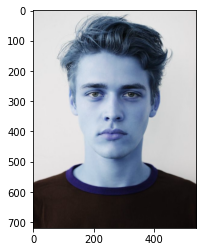

In [ ]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
image_path = '/content/97e42a82fc7911961d3ca55f54d1372c.jpg'
im = cv2.imread(image_path)
plt.imshow(im)
plt.show()

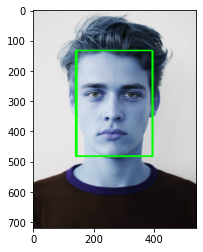

In [ ]:
faces, confidences = cv.detect_face(im)
# loop through detected faces and add bounding box
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
# display output  
    crop_img = im[startY:endY, startX:endX]      
    cv2.imwrite("output.png", crop_img)
plt.imshow(im)
plt.show()

# Using OpenCV

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml 
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml 

--2020-11-28 08:40:03--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.02s   

2020-11-28 08:40:03 (13.9 MB/s) - ‘haarcascade_eye.xml’ saved [341406/341406]

--2020-11-28 08:40:03--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting resp

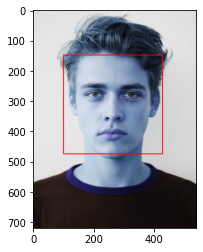

In [ ]:
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('97e42a82fc7911961d3ca55f54d1372c.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
plt.imshow(img)
plt.show()

# Using MTCNN

In [ ]:
!sudo pip install mtcnn

     |████████████████████████████████| 2.3MB 9.0MB/s 


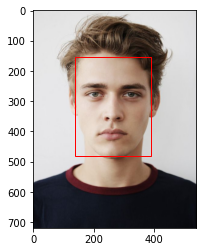

In [ ]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

filename = '97e42a82fc7911961d3ca55f54d1372c.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)